In [1]:
import numpy as np
# import matplotlib.pyplot as plt
%pylab
%matplotlib inline
from mpl_toolkits import mplot3d

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def Projection_B2U(B_vec, u_vec):
    P_u = u_vec @ u_vec.T / (u_vec.T @ u_vec)
    return P_u @ B_vec

# Non-vectorize function 
def Find_diffFre(B_vec, u):
    global gam, D, S, Sz
    B_u = B_vec.copy()
    B_u = Projection_B2U(B_u, u)
    H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
    H_zero = D * (Sz.T @ Sz)
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
    return eigenval, eigenvec

In [3]:
def Cutoff(x):
    return 1 if x > 0.8 else 0
cutoff = np.vectorize(Cutoff)

In [4]:
def Multi_diffFre(B_vec):
    global u
    for i in range(len(u)) :
        eigVal, eigVec = Find_diffFre(B_vec, u[i])
        max_idx = np.argmax(cutoff(abs(eigVec)), 1)
        sort_eigenVal = eigVal[max_idx]
        if i == 0:
            Frequency = sort_eigenVal
        else:
            Frequency = np.vstack((Frequency, sort_eigenVal))
    return abs(Frequency[:, 0] - Frequency[:, 2]).reshape(-1, 1)

In [5]:
num = int(1e4)
BX_lst = np.linspace(0.0, 50.0, num) / 1000
D = 2.87 # Ghz
gam = 28.8 # Ghz / T

In [6]:
# Spin is correct 
Sx = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]]) / np.sqrt(2)
Sy = np.array([[0, -1.j, 0], [1.j, 0, -1.j], [0, 1.j, 0]]) / np.sqrt(2)
Sz = np.array([[1, 0, 0], [0, 0, 0], [0, 0, -1]])
S = np.array((Sx, Sy, Sz))

In [7]:
u1 = np.array([[1], [1], [1]]) / 3 ** (1 / 2)
u2 = np.array([[1], [-1], [1]]) / 3 ** (1 / 2)
u3 = np.array([[-1], [1], [1]]) / 3 ** (1 / 2)
u4 = np.array([[1], [1], [-1]]) / 3 ** (1 / 2)
u = [u1, u2, u3, u4]
u_arr = np.array((u1, u2, u3, u4)).reshape(4, 3)
u_dict = {f'NV_{i}': u[i] for i in range(len(u))}

In [8]:
B_val = 0.05 # 50 mT
theta = 54.735 * np.pi / 180
phi = 45 * np.pi / 180

In [9]:
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.0288673 ]
 [0.0288673 ]
 [0.02886795]]


In [10]:
B_val = 0.05
theta = 0 * np.pi / 180
phi = 0 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.  ]
 [0.  ]
 [0.05]]


In [11]:
Projection_B2U(B_vec, np.array([[0], [0], [1]]))

array([[0.  ],
       [0.  ],
       [0.05]])

In [12]:
Projection_B2U(B_vec, u1)

array([[0.01666667],
       [0.01666667],
       [0.01666667]])

In [13]:
Projection_B2U(B_vec, u2)

array([[ 0.01666667],
       [-0.01666667],
       [ 0.01666667]])

In [14]:
Projection_B2U(B_vec, u3)

array([[-0.01666667],
       [ 0.01666667],
       [ 0.01666667]])

In [15]:
Projection_B2U(B_vec, u4)

array([[-0.01666667],
       [-0.01666667],
       [ 0.01666667]])

In [16]:
def Find_diffFre_NoU(B_vec):
    global gam, D, S, Sz
    B_u = B_vec.copy()
    H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
    print(H_mag)
    H_zero = D * (Sz.T @ Sz)
    print(H_zero)
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
    print(H_zero + H_mag)
    return eigenval, eigenvec

In [17]:
eigVal, eigVec = Find_diffFre_NoU(B_vec)

[[ 1.44+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -1.44+0.j]]
[[2.87 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   2.87]]
[[4.31+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 1.43+0.j]]


# Firstly, Check H_mag term in Hamiltonian.

In [18]:
B_val = 0.05
theta = 0 * np.pi / 180
phi = 0 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.  ]
 [0.  ]
 [0.05]]


In [19]:
# Firstly, Check H_mag term in Hamiltonian.
H_mag = (gam * np.dot(S.T, B_vec)).reshape(3, 3)
print(H_mag)

[[ 1.44+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -1.44+0.j]]


Correct answer at 50 mT v+- must be 1.44 GHz.
But we got +- 0.831 GHz which is wrong answer.

In [20]:
eigVal, eigVec = Find_diffFre_NoU(B_vec)

[[ 1.44+0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -1.44+0.j]]
[[2.87 0.   0.  ]
 [0.   0.   0.  ]
 [0.   0.   2.87]]
[[4.31+0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 1.43+0.j]]


In [21]:
theta = 0 * np.pi / 180
phi = 0 * np.pi / 180
B_vec = BX_lst * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])

In [22]:
def Find_Multi_diffFre(B_vec):
    global gam, D, S, Sz, num
    B_u = B_vec.copy()
    B_u = B_u.T.reshape(num, 3, 1)
    H_mag = gam * np.dot(S.T, B_u).T.reshape(num, 3, 3)
    H_zero = D * (Sz.T @ Sz) 
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag) 
    return eigenval, eigenvec

In [23]:
eigenVal, eigenVec = Find_Multi_diffFre(B_vec)

In [24]:
max_idx = np.argmax(cutoff(abs(eigenVec)), 2)
Frequency = np.take_along_axis(eigenVal, max_idx, axis=1)
Fre_plus, Fre_g, Fre_minus = Frequency[:, 0], Frequency[:, 1], Frequency[:, 2]

Text(0.05, 1.43, 'v- : 1.43 GHz')

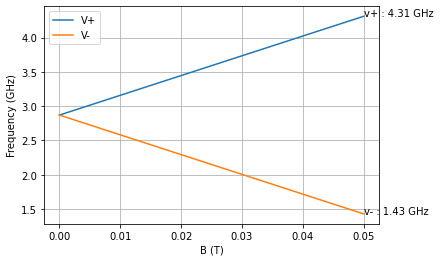

In [25]:
plt.plot(BX_lst, abs(Fre_plus-Fre_g))
plt.plot(BX_lst, abs(Fre_minus-Fre_g))
plt.grid()
plt.legend(['V+', 'V-'])
plt.ylabel('Frequency (GHz)')
plt.xlabel('B (T)')
plt.text(BX_lst[-1], abs(Fre_plus-Fre_g)[-1], f'v+ : {round(abs(Fre_plus-Fre_g)[-1], 2)} GHz')
plt.text(BX_lst[-1], abs(Fre_minus-Fre_g)[-1], f'v- : {abs(Fre_minus-Fre_g)[-1]} GHz')

# Tuning B-axis to get along with u1-axis

In [26]:
B_val = 0.05
theta = 54.76 * np.pi / 180
phi = 45 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.0288762 ]
 [0.0288762 ]
 [0.02885013]]


In [27]:
x_axs = np.array([[1], [0], [0]])
y_axs = np.array([[0], [1], [0]])
z_axs = np.array([[0], [0], [1]])

In [28]:
def Find_diffFre(B_vec, u):
    global gam, D, S, Sz
    B_u = B_vec.copy()
    B_u = Projection_B2U(B_u, u)
    print(np.sqrt(np.sum(B_u**2)))
    H_mag = (gam * np.dot(S.T, B_u)).reshape(3, 3)
    print(H_mag)
    H_zero = D * (Sz.T @ Sz)
    eigenval, eigenvec = np.linalg.eig(H_zero + H_mag)
    return eigenval, eigenvec

In [29]:
eigVal, eigVec = Find_diffFre(B_vec, u1)

0.04999999546990781
[[ 0.83138431+0.j          0.58787749+0.58787749j  0.        +0.j        ]
 [ 0.58787749-0.58787749j  0.        +0.j          0.58787749+0.58787749j]
 [ 0.        +0.j          0.58787749-0.58787749j -0.83138431+0.j        ]]


In [30]:
u1 = np.array([[1], [1], [1]]) / 3 ** (1 / 2)
u2 = np.array([[1], [-1], [-1]]) / 3 ** (1 / 2)
u3 = np.array([[-1], [-1], [1]]) / 3 ** (1 / 2)
u4 = np.array([[-1], [1], [-1]]) / 3 ** (1 / 2)
u = [u1, u2, u3, u4]
u_arr = np.array((u1, u2, u3, u4)).reshape(4, 3)
u_dict = {f'NV_{i}': u[i] for i in range(len(u))}

In [31]:
# Find angle between two NV-axis
np.arccos(np.dot(u2.T, u4) / (np.linalg.norm(u1) * np.linalg.norm(u2))) * 180 / np.pi

array([[109.47122063]])

In [44]:
# Adjust initial axis of B vector
B_val = 0.05
theta = 54.735610315 * np.pi / 180
phi = 45 * np.pi / 180
B_vec = B_val * np.array([[np.sin(theta) * np.cos(phi)], [np.sin(theta) * np.sin(phi)], [np.cos(theta)]])
print(B_vec)

[[0.02886751]
 [0.02886751]
 [0.02886751]]


In [38]:
np.sqrt(np.sum(Projection_B2U(B_vec, u1)**2))

0.04999999546990781

In [39]:
eigVal, eigVec = Find_diffFre(B_vec, u1)

0.04999999546990781
[[ 0.83138431+0.j          0.58787749+0.58787749j  0.        +0.j        ]
 [ 0.58787749-0.58787749j  0.        +0.j          0.58787749+0.58787749j]
 [ 0.        +0.j          0.58787749-0.58787749j -0.83138431+0.j        ]]


In [45]:
x = np.sqrt(3) * np.cos(phi) * np.sin(theta)
y = np.sqrt(3) * np.sin(phi) * np.sin(theta)
z = np.sqrt(3) * np.cos(theta)
print('X : ', x, ' Y : ', y, ' Z : ', z)

X :  0.9999999999722895  Y :  0.9999999999722894  Z :  1.000000000055421


In [48]:
u_arr.T

array([[ 0.57735027,  0.57735027, -0.57735027, -0.57735027],
       [ 0.57735027, -0.57735027, -0.57735027,  0.57735027],
       [ 0.57735027, -0.57735027,  0.57735027, -0.57735027]])

In [49]:
def rotate_mat(theta, phi):
    return np.array([[np.cos(theta) * np.cos(phi), np.sin(phi), -np.sin(theta) * np.cos(phi)], 
                     [-np.cos(theta) * np.sin(phi), np.cos(phi), np.sin(theta) * np.sin(phi)], 
                     [np.sin(theta), 0, np.cos(theta)]])

In [86]:
rot1 = rotate_mat(-np.pi/2, 0)
print(rot1)

[[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [-0.000000e+00  1.000000e+00 -0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]


In [87]:
n_axs = np.array((x_axs, y_axs, z_axs)).reshape(3, 3)
n_axs

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [88]:
# Transpose is work for our rotating matrix. 
rot1.T @ x_axs

array([[6.123234e-17],
       [0.000000e+00],
       [1.000000e+00]])

In [89]:
rot1.T @ n_axs

array([[ 6.123234e-17,  0.000000e+00, -1.000000e+00],
       [ 0.000000e+00,  1.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  0.000000e+00,  6.123234e-17]])

In [93]:
theta = 54.735610315 * np.pi / 180
phi = 45 * np.pi / 180
rot2 = rotate_mat(-theta, -phi)
rot2

array([[ 0.40824829, -0.70710678,  0.57735027],
       [ 0.40824829,  0.70710678,  0.57735027],
       [-0.81649658,  0.        ,  0.57735027]])

In [94]:
print(rot2.T @ u_arr.T)

[[ 3.91885968e-11  4.71404521e-01 -9.42809042e-01  4.71404521e-01]
 [ 5.55111512e-17 -8.16496581e-01 -5.55111512e-17  8.16496581e-01]
 [ 1.00000000e+00 -3.33333333e-01 -3.33333333e-01 -3.33333333e-01]]


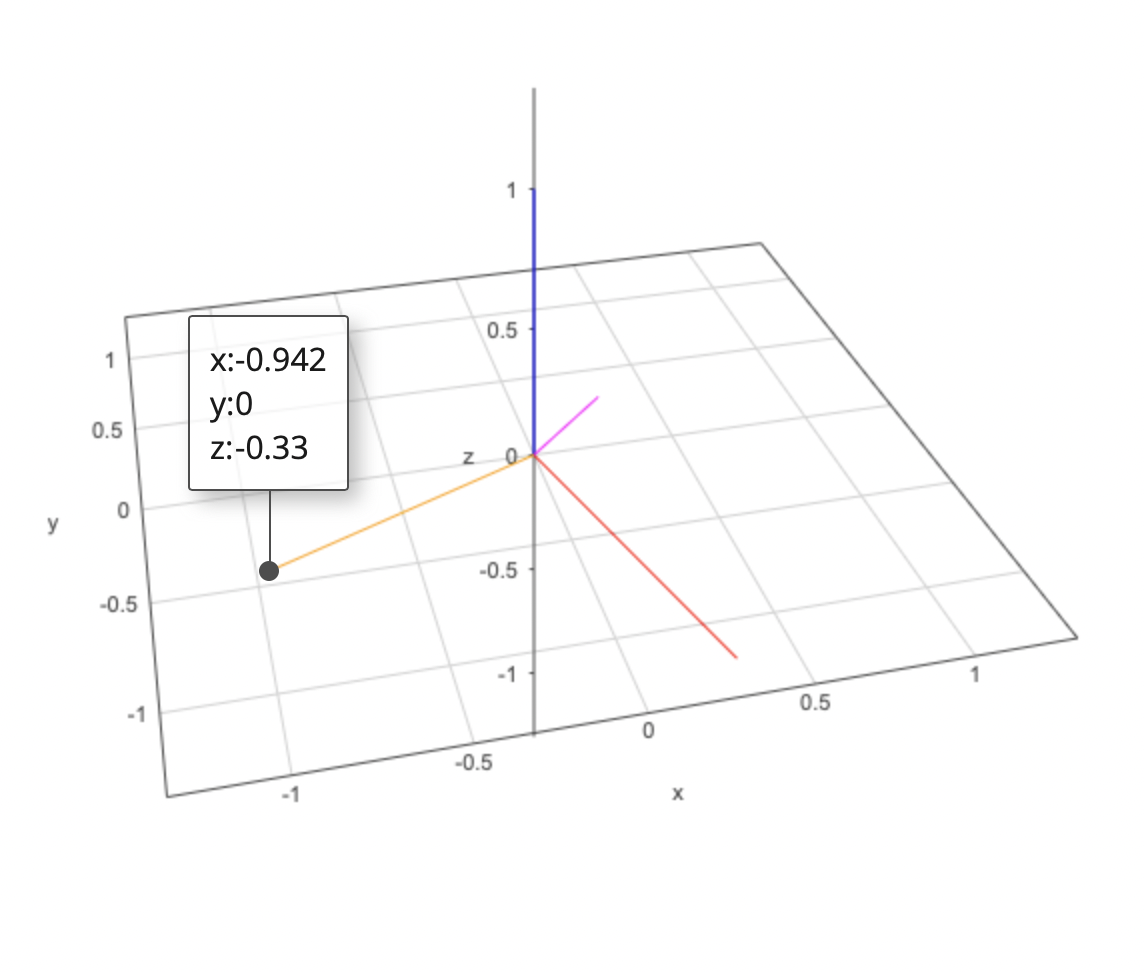